In [ ]:
%pip install cufflinks

In [ ]:
%pip install wordcloud

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import plotly
import plotly.express as px

from IPython.core.display import HTML
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from sklearn.feature_extraction.text import CountVectorizer
from pandas import DataFrame
from collections import OrderedDict 

In [47]:
df = pd.read_csv('./dataset/news_articles.csv')
df.dropna(inplace = True)
df.reset_index(inplace= True)
df.drop('index', axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   author                   2045 non-null   object 
 1   published                2045 non-null   object 
 2   title                    2045 non-null   object 
 3   text                     2045 non-null   object 
 4   language                 2045 non-null   object 
 5   site_url                 2045 non-null   object 
 6   main_img_url             2045 non-null   object 
 7   type                     2045 non-null   object 
 8   label                    2045 non-null   object 
 9   title_without_stopwords  2045 non-null   object 
 10  text_without_stopwords   2045 non-null   object 
 11  hasImage                 2045 non-null   float64
dtypes: float64(1), object(11)
memory usage: 191.8+ KB


In [5]:
df.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [48]:
df['type'].unique()

array(['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci',
       'state'], dtype=object)

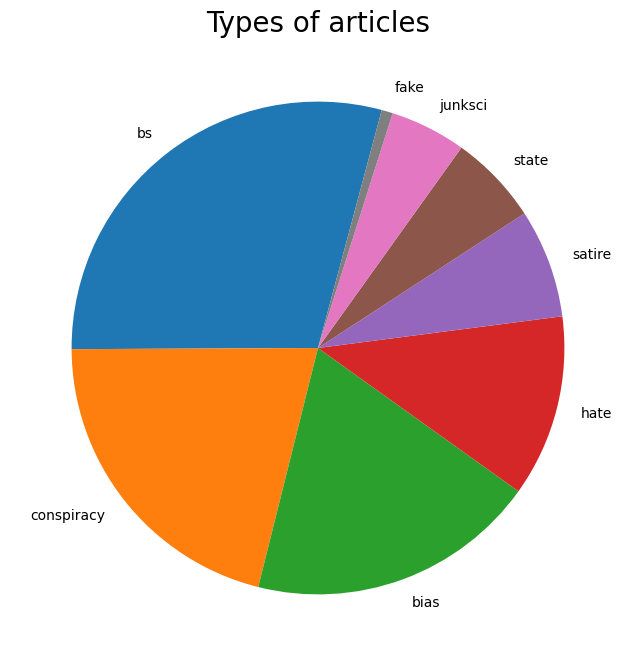

In [7]:
df['type'].value_counts().plot.pie(figsize = (8,8), startangle = 75)
plt.title('Types of articles', fontsize = 20)
plt.axis('off')
plt.show()

In [8]:
data = df['text'][0]
data

'print they should pay all the back all the money plus interest the entire family and everyone who came in with them need to be deported asap why did it take two years to bust them \nhere we go again another group stealing from the government and taxpayers a group of somalis stole over four million in government benefits over just  months \nweve reported on numerous cases like this one where the muslim refugeesimmigrants commit fraud by scamming our systemits way out of control more related'

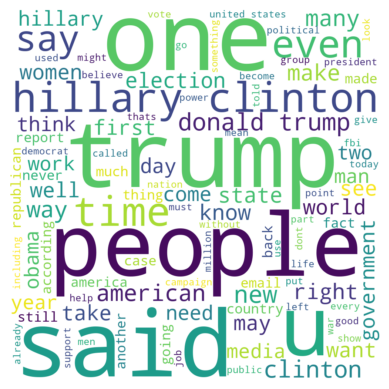

In [42]:
wc = WordCloud(background_color="white", max_words=100,
               max_font_size=256,
               random_state=42, width=1000, height=1000)
wc.generate(' '.join(df['text_without_stopwords']))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [49]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() ## Converting the type column from object datatype to numerical datatype
df['type'] = le.fit_transform(df['type'])
df.head()

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,0,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,0,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [50]:
le.classes_

array(['bias', 'bs', 'conspiracy', 'fake', 'hate', 'junksci', 'satire',
       'state'], dtype=object)

In [51]:
le.transform(['bias', 'bs', 'conspiracy', 'fake', 'hate', 'junksci', 'satire' , 'state'])

array([0, 1, 2, 3, 4, 5, 6, 7])

In [52]:
mapping = {}
for i in le.classes_:
    mapping[i] = le.transform([i])[0]
print(mapping)

{'bias': 0, 'bs': 1, 'conspiracy': 2, 'fake': 3, 'hate': 4, 'junksci': 5, 'satire': 6, 'state': 7}


Our main aim is to predict the article type. Before moving forward, let's remove '.com' from the main urls.

In [54]:
urls = []
for url in df['site_url']:
    urls.append(url.split('.')[0])
df['site_url'] = urls

In [55]:
df = df.sample(frac = 1)

In [56]:
features = df[['site_url', 'text_without_stopwords']]
features.head(5)

,site_url,text_without_stopwords
1162,infowars,clinton campaign circulated paul ryan relative...
1141,globalresearch,getting minutes sunlight per day stop depressi...
1955,westernjournalism,see dems accept foreign cash disrupt trump ral...
2032,wnd,hillary emails whitelisted obamas blackberry p...
46,21stcenturywire,st century wire says us college students conti...


In [57]:
features['url_text'] = features["site_url"].astype(str) + " " + features["text_without_stopwords"]
features.drop(['site_url', 'text_without_stopwords'], axis = 1, inplace = True)

C:\Users\devas\AppData\Local\Temp\ipykernel_5020\228521908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['url_text'] = features["site_url"].astype(str) + " " + features["text_without_stopwords"]
C:\Users\devas\AppData\Local\Temp\ipykernel_5020\228521908.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(['site_url', 'text_without_stopwords'], axis = 1, inplace = True)


In [58]:
features.head()

,url_text
1162,infowars clinton campaign circulated paul ryan...
1141,globalresearch getting minutes sunlight per da...
1955,westernjournalism see dems accept foreign cash...
2032,wnd hillary emails whitelisted obamas blackber...
46,21stcenturywire st century wire says us colleg...


In [59]:
X = features
y = df['type']

In [60]:
y = y.tolist()

using TF-IDF

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

tfidf_vectorizer = TfidfVectorizer(use_idf = True, stop_words = 'english')

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['url_text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['url_text'])

In [62]:
print(X_train_tfidf.shape)
X_test_tfidf.shape

(1533, 39508)


(512, 39508)

In [63]:
tfidf_train = pd.DataFrame(X_train_tfidf.A, columns = tfidf_vectorizer.get_feature_names_out())

In [64]:
tfidf_train.head()

,100percentfedup,21stcenturywire,___,_url,aa,aab,aafe,aah,aaja,aand,...,überreden,überteuerten,übertrieben,überwacht,überwachungskameras,überwältigen,überwältigt,übrig,übrige,übte
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Above is the representation of the tf-idf matrix. The first represents the 'first url_text' and corresponding column values represent the value of that column for 1st document. One point to note here is the presence of a very large number of zeros. We will be dealing with that in the next section

In [65]:
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
rfc.fit(tfidf_train, y_train)
y_pred = rfc.predict(X_test_tfidf)
RFscore = metrics.accuracy_score(y_test, y_pred)
print("The accuracy is : ", RFscore)

The accuracy is :  0.833984375


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [66]:
print("The Weighted F1 score is: ", metrics.f1_score(y_test, y_pred, average = 'weighted'))

The Weighted F1 score is:  0.8329632034922005


# Embedding  

By applying the tf-idf method we used above, we observed that we get a lot of zeros for sentence representation, i.e we got a sparse matrix. Sparse Matrix is not a true representation for the corpus, and it doesn't take into account the similarity of the words. That is where Embeddings come to our rescue.

A word embedding is a class of approaches for representing words and documents using a dense vector representation.

It is an improvement over more the traditional bag-of-word model encoding schemes where large sparse vectors were used to represent each word or to score each word within a vector to represent an entire vocabulary. These representations were sparse because the vocabularies were vast and a given word or document would be represented by a large vector comprised mostly of zero values.

Instead, in an embedding, words are represented by dense vectors where a vector represents the projection of the word into a continuous vector space.

The position of a word within the vector space is learned from text and is based on the words that surround the word when it is used.

The position of a word in the learned vector space is referred to as its embedding.

In [29]:
!pip install tensorflow --user


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [68]:
y_train = np.array(y_train)
y_test = np.array(y_test)

We will set the maximum number of words allowed to be 100.

In the test dataset, there can be words that are Out of Vocabulary(OOV), we will encode those words as OOV

Embedding Dimension has been set to 32

A lot of sentences might be very long, we will keep the maximum length to be 120.

You might be wondering that all the sentences are not neccessarry to be of the same length, in order to tackle that we will use the concept of padding i.e to add zeros before or after the sentence to keep the length uniform.

In [69]:
vocab_size = 10000
oov_token = "<OOV>"
embedding_dim = 32
max_length = 120
padding = 'post' # 
trunc_type = 'post'

In [70]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_token)
tokenizer.fit_on_texts(X_train['url_text'])
# tokenizer.word_index # Mapping of words to numbers

In [73]:
testing_sequences = tokenizer.texts_to_sequences(X_test['url_text']) 
# Converting the test data to sequences

In [74]:
train_padded = pad_sequences(training_sequences, maxlen = max_length, padding = 'post', truncating = trunc_type)
train_padded

In [76]:
train_padded.shape

(1533, 120)

In [77]:
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, padding = 'post', truncating = trunc_type)

In [78]:
testing_padded.shape

(512, 120)

In [79]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'softmax')
])

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

C:\Users\devas\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [80]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [81]:
num_epochs = 10
history = model.fit(train_padded, y_train, epochs = num_epochs, validation_data = (testing_padded, y_test))

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.2536 - loss: 1.9865 - val_accuracy: 0.2949 - val_loss: 1.6935
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4104 - loss: 1.5619 - val_accuracy: 0.5684 - val_loss: 1.3374
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6792 - loss: 1.1307 - val_accuracy: 0.7109 - val_loss: 1.0085
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8141 - loss: 0.7384 - val_accuracy: 0.7500 - val_loss: 0.7818
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9000 - loss: 0.4747 - val_accuracy: 0.8457 - val_loss: 0.6007
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9769 - loss: 0.2814 - val_accuracy: 0.9004 - val_loss: 0.4784
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9789 - loss: 0.1757 - val_accuracy: 0.9160 - val_loss: 0.4136
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9815 - loss: 0.1065 - val_accuracy: 0.9297 - val_loss

In [82]:
print("Training Accuracy: ", history.history['accuracy'][9])
print("Testing Accuracy: ", history.history['val_accuracy'][9])

The Training Accuracy we get is:  0.994781494140625
The Testing Accuracy we get is:  0.92578125
